# 2D visualization of French Air Traffic Control en-route elementary sectors of Metropolitan France

#### Air traffic control sectors data come from the [SIA website](https://www.sia.aviation-civile.gouv.fr) in the eAIP FRANCE section (ENR 3.8)

##### <br> *Modify the following URL according to the latest eAIP document available*

In [1]:
url = "https://www.sia.aviation-civile.gouv.fr/dvd/eAIP_08_NOV_2018/FRANCE/AIRAC-2018-11-08/html/eAIP/FR-ENR-3.8-fr-FR.html#ENR-3.8"

##### <br> *Refer to tables_builder.ipynb to generate sectors and volumes files (to be updated to better manage French borders)*

#### Load tables

In [2]:
%run tables_builder.py

In [3]:
(vol, cs) = get_tables(url)

In [4]:
vol.sample(3)

,volume,elementary_sector,acc,level_min,level_max,geometry
92,BT 1,BT,LFMM,0,195,"POLYGON ((7.279 43.252, 8.037000000000001 43.4..."
150,DO 2,DO,LFFF,195,265,"POLYGON ((1.691 47.832, 2.056 47.719, 2.704 47..."
53,JS,JS,LFRR,255,355,"POLYGON ((-2 50, -0.25 50, -0.25 48.462, -0.74..."


In [5]:
cs.sample(3)

,control_sector,acc,volumes,elementary_sectors
24,RL1,LFBB,"[R1, L1]","[L1, R1]"
35,MZIU,LFRR,"[MI, MU, ZI, ZU]","[MU, ZU, ZI, MI]"
32,RL5,LFBB,"[R5, L5]","[R5, L5]"


#### <br> Lambert Azimuthal Equal Area Projection (EPSG: 3035)

In [6]:
vol.crs = {'init': 'epsg:4326'} # WGS84
vol = vol.to_crs(epsg=3035) # Lambert Azimuthal Equal Area projection
vol.sample(3)

,volume,elementary_sector,acc,level_min,level_max,geometry
206,KH,KH,LFEE,345,365,"POLYGON ((4138030.735713507 2749510.859579122,..."
165,TB 1,TB,LFFF,0,195,"POLYGON ((3723559.135640327 3133654.895289268,..."
199,HN,HN,LFEE,365,999,"POLYGON ((3666723.260242447 3073395.395516842,..."


#### <br> Number of volumes and sectors per ACC

In [7]:
s_cs = cs['acc'].value_counts()
s_vol = vol['acc'].value_counts()
s_es = vol.groupby('acc')['elementary_sector'].nunique()
df = pd.concat([s_vol.rename('nb_volumes'), s_es.rename('nb_elementary_sectors'), s_cs.rename('nb_control_sectors')], axis=1, sort=True)
df['total_sectors'] = df['nb_elementary_sectors'] + df['nb_control_sectors']
df.sort_values(['total_sectors'])

,nb_volumes,nb_elementary_sectors,nb_control_sectors,total_sectors
LFFF,54,29,38,67
LFEE,30,23,52,75
LFBB,39,38,58,96
LFRR,42,31,84,115
LFMM,59,47,101,148


#### <br> Visualization tool

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
from descartes import PolygonPatch
import matplotlib.gridspec as gridspec

cols = 5
color = 'gray'

pd.set_option('mode.chained_assignment', None)
vol['geometry'] = vol.buffer(0.01)

def es_plot(acc_name):
    s = vol.query('acc == @acc_name').dissolve(by='elementary_sector')['geometry']
    nb_cases = s.count()
    fig = plt.figure(figsize=(12, nb_cases / 2))
    ax = []
    gs = gridspec.GridSpec(nb_cases // cols + 1, cols)
    gs.update(hspace=0.4, wspace=0.3)
    
    index = 0
    for i, v in s.items():
        row = (index // cols)
        col = index % cols
        ax.append(fig.add_subplot(gs[row, col]))
        ax[-1].set_title(i)
        ax[-1].add_patch(PolygonPatch(v, fc=color, ec=color, alpha=0.8, zorder=2))
        ax[-1].autoscale() #autoscale_view(axis='y')
        ax[-1].set_xticklabels([])
        ax[-1].set_yticklabels([])
        ax[-1].axis('off')
        index += 1
    plt.show()

#### <br> Visualize the elementary sectors of all ACCs in Metropolitan France

Elementary sectors of LFBB: 



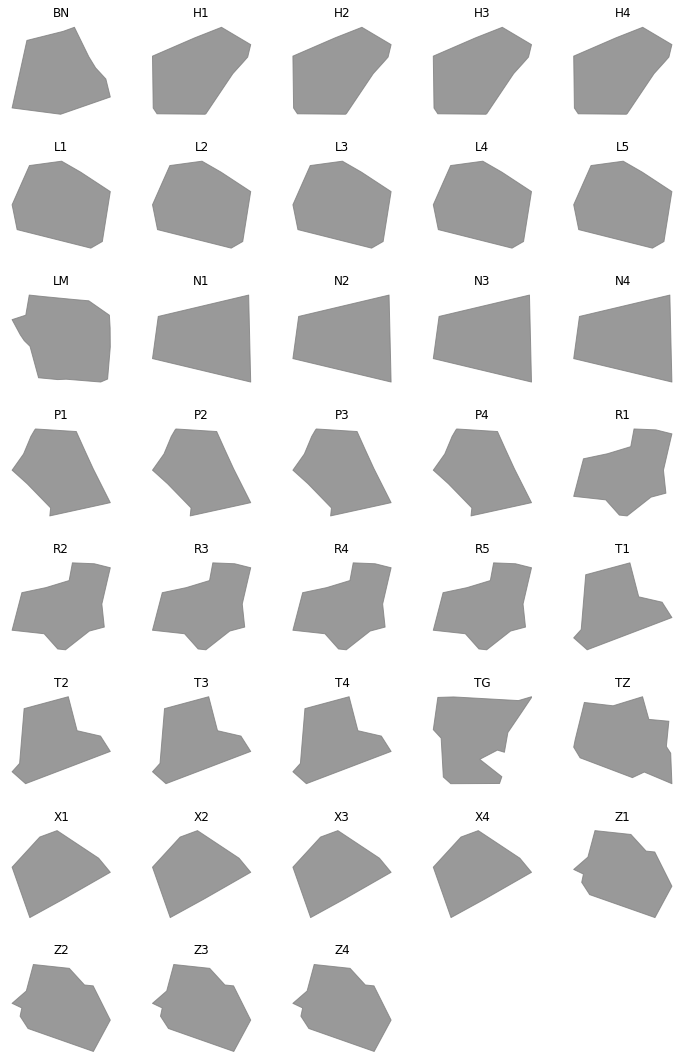



Elementary sectors of LFRR: 



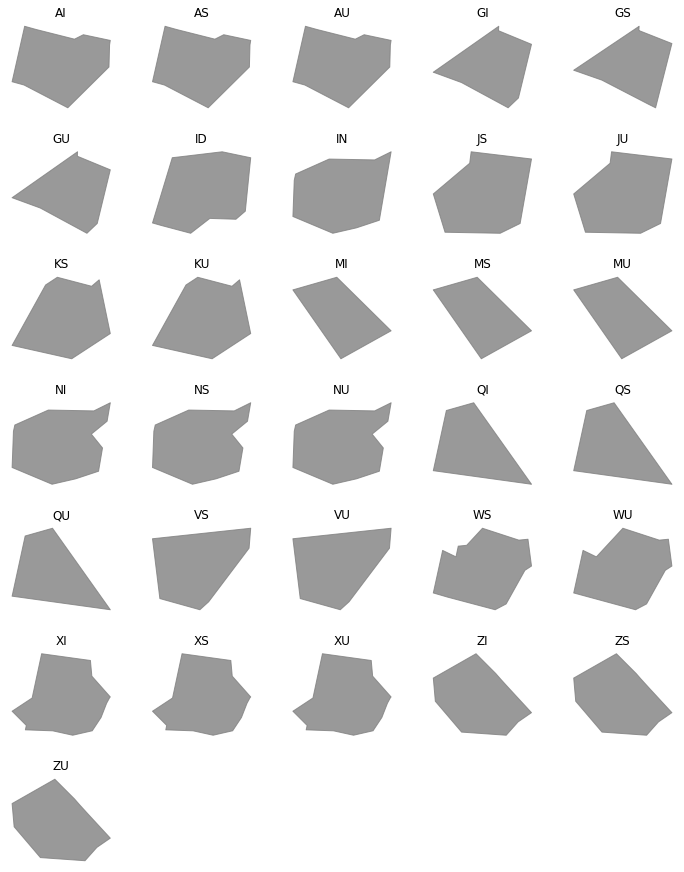



Elementary sectors of LFMM: 



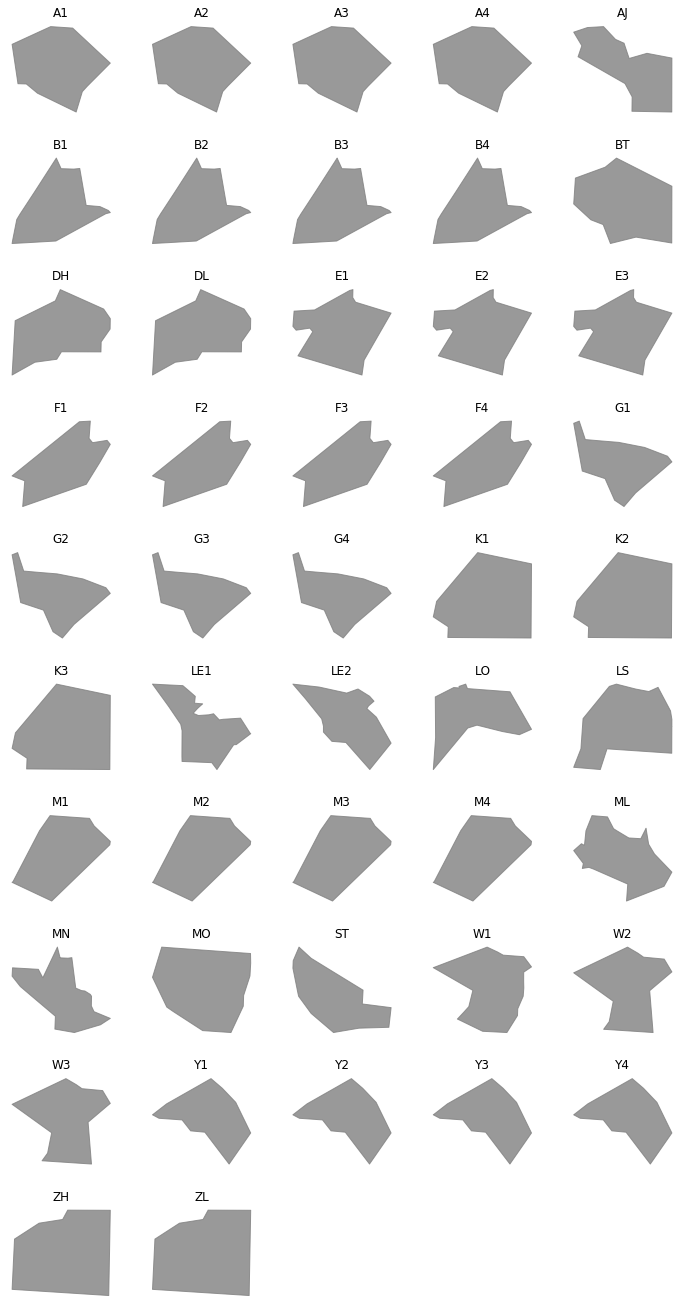



Elementary sectors of LFFF: 



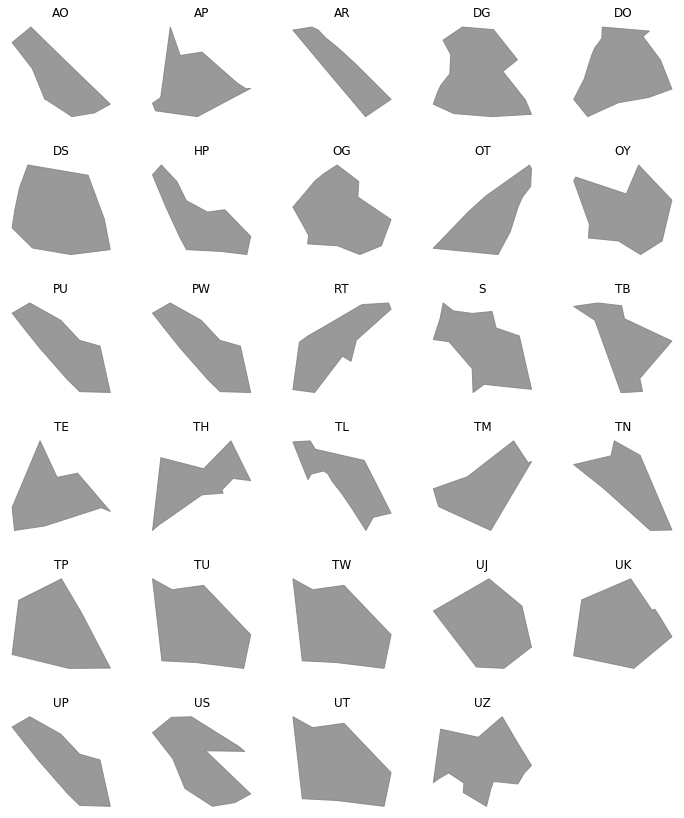



Elementary sectors of LFEE: 



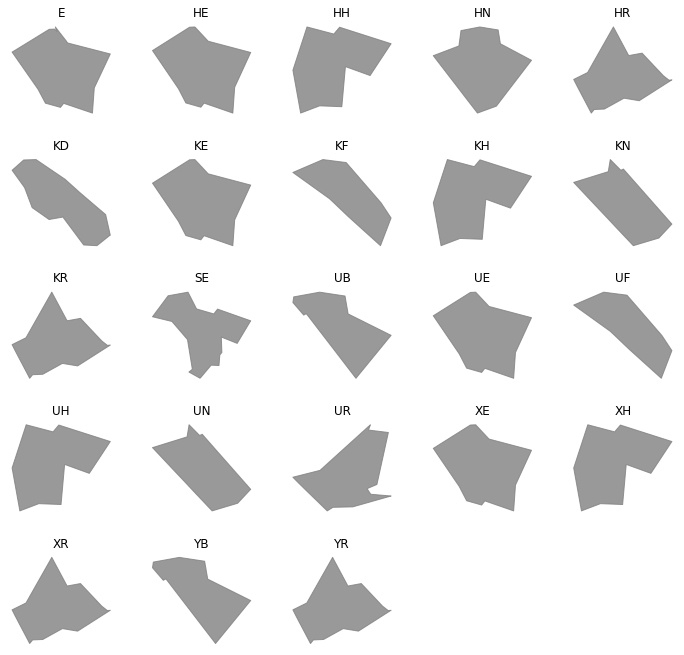

In [9]:
for acc in list(vol['acc'].unique()):
    print('Elementary sectors of {}: \n'.format(acc))
    es_plot(acc)
    print('\n')